# Communities and crime data set
## El data set 
- Lo que tenemos entre manos son datos socioeconómicos del año 1990 en Estados Unidos. Un total de 1994 instancias con 128 atributos, aunque veremos cuántos de esos realmente nos sirven. 
- Sabemos además que hay valores perdidos/nulos.
- Los atributos reales están ya normalizados a un rango 0.00-1.00. 
- La etiqueta es el atributo "ViolentCrimesPerPop".
## El problema
Tenemos que predecir el número de crímenes violentos en proporción a la población. Para ello tenemos muchas "features" como: el porcentaje de hogares que reciben ingresos de la seguridad social, la mediana de ingresos, el presupuesto de la policia en proporción a la población, etc... 
## Elementos
- X: Atributos predictores, nos dan 126, pero tendremos que descartar alguno no predictor.
- Y: Número de crímenes violentos en proporción a la población.
- Función objetivo: Dados los atributos de una comunidad, predecir el número de crímenes violentos en proporción a su población.
## Archivo de datos
El CSV que nos proporcionan no tiene el nombre de los atributos, así que lo primero que he hecho es extraer el nombre de los mismos del archivo que nos dan (communities.name) y añadirlo en el CSV para que sea más fácil preprocesarlos.
## Semillas
Ya que *sklearn* nos ofrece parámetros para fijar semillas cuando haga falta, no las he puesto de manera global. Sin embargo, siempre que llamo a una función con algún componente aleatorio, la fijo como parámetro.


## Clase de funciones a utilizar
Es lo habitual probar primero la clase de funciones lineal, es decir, combinaciones lineales de los predictores sin ninguna transformación.
Si al validar modelos hubiera observado mucho error en el ajuste, es decir, demasiado sesgo, intentaría añadir alguna transformación no lineal. Sin embargo, no ha hecho falta.

In [1]:
import pandas as pd
import numpy as np

# Utilizo pandas, que nos ofrece una interfaz mucho más "friendly"
# a la hora de trabajar con csvs, hacer algún análisis inicial,
# limpiar datos, etc...

raw_data = pd.read_csv('./datos/communities.data')
raw_data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


## Eliminando atributos no predictores
He considerado adecuado eliminar algunos atributos considerados no predictores:
- County: Es un código de area administrativa y además tiene muchos datos perdidos.
- Community: Un código que identifica la comunidad en cuestión, no nos interesa porque es un identificador de una instancia en concreto.
- Community Name: Lo mismo, pero con el nombre de la comunidad correspondiente al código.
- Fold: Nos proporcionan ya una descomposición para validación cruzada, la desechamos.
- State: Tal como está dado no puede usarse. Ya que confundiría a los algoritmos de entrenamiento (que un estado tenga el código 20 no significa que sea más que uno con código 3). Al principio iba a tratar de codificar este attributo categórico con un "One Hot Encoder", pero al ser tantos estados distintos el número de categorías iba a aumentar demasiado.

Nota: Esto entraría en el punto 4 de preprocesamiento, lo he hecho antes del split entre training y test para poder visualizar los datos sin las columnas que sobran.

In [2]:
# Dropeamos las columnas con datos no predictores

data_without_some_columns = raw_data.drop(['state','county', 'community', 'communityname', 'fold'], axis=1)
data_without_some_columns

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


## ¿Qué hacemos con los datos perdidos?
Al ser un data set real, es normal que nos encontremos con datos que faltan. Vamos a echar un vistazo, a ver cuantos datos faltan en cada columna.

In [3]:
# Itero por cada columna y cuento los datos perdidos que tiene

for i,c in (data_without_some_columns == '?').sum().items() :
    if c > 0:
        print(i,c)
  

OtherPerCap 1
LemasSwornFT 1675
LemasSwFTPerPop 1675
LemasSwFTFieldOps 1675
LemasSwFTFieldPerPop 1675
LemasTotalReq 1675
LemasTotReqPerPop 1675
PolicReqPerOffic 1675
PolicPerPop 1675
RacialMatchCommPol 1675
PctPolicWhite 1675
PctPolicBlack 1675
PctPolicHisp 1675
PctPolicAsian 1675
PctPolicMinor 1675
OfficAssgnDrugUnits 1675
NumKindsDrugsSeiz 1675
PolicAveOTWorked 1675
PolicCars 1675
PolicOperBudg 1675
LemasPctPolicOnPatr 1675
LemasGangUnitDeploy 1675
PolicBudgPerPop 1675


/home/alex/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Podemos ver que hay unas cuantas columnas en esta situación, tenemos tres opciones:
- Eliminar las instancias que tienen datos perdidos en alguna de las categorías (la descartamos, porque son demasiadas).
- Eliminar las columnas con datos perdidos.
- De alguna manera rellenar los datos que faltan. Esta sería quizás la ideal, pero no tenemos la información suficiente para inferir los datos perdidos.

Tendremos que eliminar las columnas con datos perdidos. Salvo "OtherPerCap" que solamente tiene 1 instancia sin información. En ese caso simplemente buscamos dicha instancia y la eliminamos para que no cause problemas.

In [4]:
# Saco por pantalla la fila con la celda 'OtherPerCap' perdida

print(data_without_some_columns.index[data_without_some_columns['OtherPerCap'] == '?'].tolist())

# Elimino la fila

data_without_some_columns = data_without_some_columns.drop(130)

[130]


Por último, eliminamos las columnas con 1675 datos perdidos:

In [5]:

# Utilizo "list comprenhension" para obtener el nombre de las columnas
# que aún tienen datos perdidos

columns_to_drop = [i for i,c in (data_without_some_columns == '?').sum().items() if c > 0]

# Elimino esas columnas

clean_data = data_without_some_columns.drop(columns_to_drop, axis=1)
clean_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [6]:
# Ahora que no tenemos ningún '?' podemos asegurarnos de que todas las columnas son de tipo float64
clean_data = clean_data.astype('float64')

## ¿Proyección?
Según la documentación de sklearn: *Random Projections are a simple and computationally efficient way to reduce the dimensionality of the data by trading a controlled amount of accuracy (as additional variance) for faster processing times and smaller model sizes.*


La proyección nos ayuda a reducir la dimensionalidad de X, sin embargo, no he tenido problemas de tiempo a la hora de ajustar los modelos, por lo que no veo necesario hacer ningún *tradeoff* aquí.

## Alguna visualización
Ahora que tenemos los datos "limpios", podemos obtener alguna representación visual.

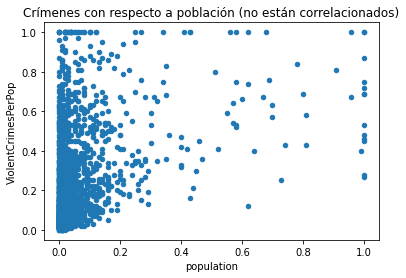

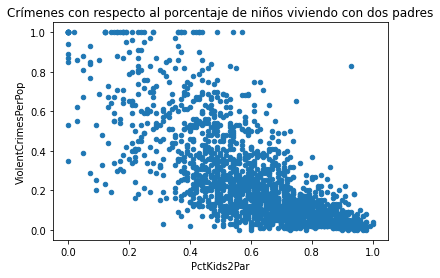

In [7]:

# Pandas además nos ofrece una interfaz muy clara para hacer plots 
# utilizando por debajo matplotlib

clean_data.plot(x='population', y='ViolentCrimesPerPop', kind='scatter', title="Crímenes con respecto a población (no están correlacionados)")
clean_data.plot(x='PctKids2Par', y='ViolentCrimesPerPop', kind='scatter', title="Crímenes con respecto al porcentaje de niños viviendo con dos padres")


In [10]:

# Obtengo la matriz de correlación

corr = clean_data.corr()['ViolentCrimesPerPop'].to_frame()

# Imprimo solo la correlación de "ViolentCrimesPerPop" con todas
# las demás columnas. Con colores para que sea vea más claro.
corr.style.background_gradient('Reds')



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

## Obteniendo X, Y 
*ViolentCrimesPerPop* es la etiqueta que queremos predecir. Por eso, generamos una matriz X sin esa columna y un vector Y con solo esa columna.

In [ ]:

# Para X dropeo la etiqueta

X = clean_data.drop('ViolentCrimesPerPop', axis=1).to_numpy()

# Para Y me quedo solo con la etiqueta

Y = clean_data['ViolentCrimesPerPop'].to_numpy()

# Imprimo la forma de X e Y

print('X shape:', X.shape)
print('Y shape:', Y.shape)

## Conjuntos de entrenamiento y test
He aplicado la regla del 80/20 ya que el dataset no es inmenso. Quizás un 70/30 hubiese sido idílico para poder establecer la cota de Eout con más seguridad, pero al no ser tan grande, me he decantado por tener más datos para entrenar.

In [ ]:
from sklearn.model_selection import train_test_split

# Utilizamos esta función de sklearn que nos permite además
# fijar una semilla y el tamaño del conjunto test cómodamente

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=9, shuffle=True)

# Imprimo la forma de los conjuntos

print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

## Métrica de error
Aquí tenemos fundamentalmente dos opciones:
- Error cuadrático medio (MSE)
- Error absoluto medio (MAE)

La diferencia esencial es que MSE tiene una penalización adicional a los errores grandes. 
¿Cuál es la ventaja de MAE? Que es mas robusto a *outliers*.

Por lo general, si consideramos los *outliers* anomalías en observaciones, debemos usar MAE. Si, en cambio, tenemos que considerarlos para nuestro estudio deberíamos usar MSE. 

En concreto, considero que en este data set es perfectamente válido que una comunidad sea un *outlier* en crimen por lo que me he decantado por MSE.

## Regularización
La regularización es considerada nuestro primer remedio contra el overfitting:
- Restringe el modelo de aprendizaje para reducir el error fuera de la muestra. 
- Ayuda especialmente si hay ruido en el conjunto de datos de entrenamiento. 

Alguno de los modelos que vamos a validar tienen opciones de regularización, veremos si aplicarla es beneficioso para el aprendizaje.

## Validación cruzada
Para elegir un modelo, vamos a dividir el training test en 10 partes iguales:
- Probamos cada modelo entrenando en 9 partes y validando en 1.
- Lo hacemos 10 veces, dejando para validar 1 parte distinta cada vez.
- Hacemos la media de las validaciones.
- En este caso las 10 partes se hacen de manera aleatoria (no hay nada que estratificar para hacer representativas todas las partes), será distinto en el problema de clasificación.

¿Cuál es el objetivo de la validación?

Utilizar Eval como un estimador de Eout no sesgado para cada modelo que probemos y así hacer una buena elección, y no guiarnos con Ein.

¿Cuál es la ventaja de la validación cruzada con respecto a la validación? 

Está considerada empíricamente un mejor estimador del error fuera de la muestra. Y nos permite usar la validación para la elección de un modelo con más confianza.

In [ ]:
from sklearn.model_selection import cross_val_score

# Helper para evaluar los modelos con cross validation y además
# tener un buen output para comparar

def validate_models(model_strings, models, X_train, Y_train):
    validation_results = {'mean_squared_error':[], 'std_dev_error': []}
    for model in models:
        # Utilizamos cross_val_score de sklearn que hace la validación cruzada por nosotros.
        # Devuelve el valor de cada validación (en este caso 10)
        results = cross_val_score(model, X_train, Y_train, scoring = "neg_mean_squared_error", cv=10)
        
        # Hacemos la media y desviación típica de las 10 validaciones
        
        validation_results['mean_squared_error'].append(np.mean(np.abs(results)))
        validation_results['std_dev_error'].append(np.std(np.abs(results)))
        
        # Devolvemos una tabla con los modelos y sus métricas
        
    return pd.DataFrame(data=validation_results, index=model_strings)

## Ordinary Least Squares
Empezamos por uno de los métodos que implementamos en la práctica 1, no hay hiperparámetros que ajustar. 

Tratamos de minimizar: $\min_{w} || X w - y||_2^2$

Computa la pseudoinversa $(X^T X)^{-1} X^T$ y después simplemente multiplica esta por y (las labels) del dataset, para obtener los pesos  w con pérdida mínima.

In [ ]:

# Modelo Ordinary Least Squares

from sklearn.linear_model import LinearRegression

models = [
    LinearRegression(),
]

model_strings = [
    'OLS',
]

validate_models(model_strings, models, X_train, Y_train)

## Ridge Regression
Este modelo es básicamente *Linear Least Squares* con regularización por la norma l2. 
Trata de minimizar la función:
||y - Xw||^2_2 + alpha * ||w||^2_2

Con esta regularizacón tratamos de hacer los pesos más pequeños, más adelante, veremos otro tipo de regularización con Lasso.

He probado con alpha {0.1, 0.5, 1, 1.5, 2, 3}.

Alpha marca la fuerza de la regularización.
El solver es por defecto SVD, que no tiene en cuenta la semilla, por eso no se la pongo.

In [ ]:

# Modelo Ridge Regression

from sklearn.linear_model import Ridge
models = [
    Ridge(alpha=0.1),
    Ridge(alpha=0.5),
    Ridge(alpha=1),
    Ridge(alpha=1.5),
    Ridge(alpha=2),
    Ridge(alpha=3),
]

model_strings = [
    "Ridge alpha = 0.1",
    "Ridge alpha = 0.5",
    "Ridge alpha = 1.0",
    "Ridge alpha = 1.5",
    "Ridge alpha = 2.0",
    "Ridge alpha = 3.0"
]

validate_models(model_strings, models, X_train, Y_train)

## Stochastic Gradient Descent Regressor
Es el método que ya conocemos:
- Se estima el gradiente de la perdida para cada dato.
- Se actualizan los pesos con el learning rate (por defecto 0.01) que le pasemos.
- Por defecto se barajean los datos después de cada *epoch*.
- Por defecto el learning rate se va actualizando con el siguiente esquema: eta = eta0 / pow(t, power_t) Siendo power_t otro parámetro (por defecto 0.25)

Con opciones de regularización:
- Norma l2: $R(w) := \frac{1}{2} \sum_{j=1}^{m} w_j^2 = ||w||_2^2$
- Norma l1: $R(w) := \sum_{j=1}^{m} |w_j|$

He probado sin regularización, con regularización l1 y con regularización l2 para alpha = {0.0001, 0.0002, 0.00025}

In [ ]:

# Modelo Stochastic Gradient Descent Regressor

from sklearn.linear_model import SGDRegressor
models = [
    SGDRegressor(alpha=0, random_state=1),
    SGDRegressor(alpha = 0.0001, random_state=1),
    SGDRegressor(alpha=0.0002, random_state=1),
    SGDRegressor(alpha=0.00025, random_state=1), 
    SGDRegressor(penalty='l1', alpha=0.0001, random_state=1),
    SGDRegressor(penalty='l1',alpha=0.0002, random_state=1),
    SGDRegressor(penalty='l1', alpha=0.0025, random_state=1),
]

model_strings = [
    "SGD, sin regularización",
    "SGD, regularización L2 alpha = 0.0001",
    "SGD, regularización L2 alpha = 0.0002",
    "SGD, regularización L2 alpha = 0.00025",
    "SGD, regularización L1 alpha = 0.0001",
    "SGD, regularización L1 alpha = 0.0002",
    "SGD, regularización L1 alpha = 0.00025",
]

validate_models(model_strings, models, X_train, Y_train)

## Lasso
Pese a que este método no lo conocemos también, he decidido probarlo.
Tiene como característica principal intentar que haya muchos pesos a cero. Para que las soluciones dependan de pocos atributos.

- La función a minimizar es:
$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$
- Utiliza L1 como regularización.
- Sigue el modelo de OLS y Ridge de la pseudoinversa. 

In [ ]:

# Modelo Lasso

from sklearn.linear_model import Lasso
models = [
    Lasso(alpha=0.1),
]

model_strings = [
    "Lasso, regularización alpha = 0.1",
   
]

validate_models(model_strings, models, X_train, Y_train)

## Selección del mejor modelo
Me he quedado con los hiperparámetros de cada modelo que mejor resultado han dado

In [ ]:

# Vuelvo a hacer output de los mejores hiperparámetros para 
# cada modelo

models = [
    LinearRegression(),
    Ridge(alpha=1.5),
    SGDRegressor(alpha=0.0001, random_state=1),
    Lasso(alpha=0.1)
]

model_strings = [
    "OLS",
    "Ridge alpha = 1.5",
    "SGD, regularización L2 alpha = 0.0001",
    "Lasso, regularización alpha = 0.1"
]

validate_models(model_strings, models, X_train, Y_train)

- Podemos observar que la regularización de Ridge mejora un poco los resultados de OLS.
- SGD se queda un poco más atrás y Lasso está directamente fuera de la competición (parece que quedarse con pocas features en este problema no es buena idea).
- La regularización l2 para disminuir el valor de los pesos mejora efectivamente el error fuera de la muestra (al menos con el estimador que tenemos de validación cruzada)

## Utilizamos el conjunto de test

Ahora tenemos que entrenar al modelo ganador (Ridge con alpha 1.5) con todos los datos de training y probarlo con los datos de test.

In [ ]:
from sklearn.metrics import mean_squared_error

# Ridge con alpha = 1.5 es el modelo final

final_model = Ridge(alpha = 1.5)

# Lo entrenamos con el conjunto de training

final_model.fit(X_train, Y_train)

# Predecimos las etiquetas del conjunto de test

predictions = final_model.predict(X_test)

# Medimos el error de la predicción

etest = mean_squared_error(predictions, Y_test)

print("Etest (MSE): ", etest)

## Comparando estimador de Eout (validación) con Etest
Consideramos el *overfitting* un problema, el ruído (determinístico y estocástico) la causa, la regularización y la validación, la cura.
Con ambas hacemos un esfuerzo por reducir Eout, más que Ein.

El error que hemos obtenido en validación para el modelo ganador, debe ser un estimador no sesgado del error fuera de la muestra (si no, no valdría de nada elegir un modelo basándonos en esta métrica).
En teoría, este error que hemos obtenido en validación, debería ser mayor o igual que el que obtenemos fuera de la muestra, ya que después de elegir el modelo, entrenamos con todos los datos antes de valorarlo con los datos de test.

En este caso, ha resultado que: Etest < Eval.

##  ¿Qué modelo propones y que error Eout tiene?
Como hemos comprobado, Ridge Regression con alpha = 1.5 ha sido el modelo que por validación cruzada mejor se comporta y es el que hemos utilizado para predecir datos del conjunto de test.

Gracias a la desigualdad de Hoeffding podemos estimar la cota de generalización con el conjunto test:

$E_{out}(g) <= E_{in}(g) + \sqrt(\frac{1}{2N}ln\frac{2M}{\alpha})$
Siendo $\alpha$ el nivel de tolerancia.

Como en este caso utilizamos $E_{test}$ y el nivel de hipótesis es solamente una, podemos utilizarla así:

$E_{out}(g) <= E_{test}(g) + \sqrt(\frac{1}{2N}ln\frac{2}{\alpha})$

Con $M=1$.

Haciendo las cuentas aquí abajo podemos afirmar con un 95% de confianza que $E_{out}$ será menor o igual que 0.085.

In [ ]:
N = len(X_test)
alpha = 0.05

eout_bound = etest + np.sqrt((1 / (2*N)) * np.log(2 / alpha))

print('Eout(g) <= ', eout_bound)